In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metric
import data

In [2]:
path = data.DEFAULT_PATH

loss = np.load(path / "loss.npy")
val_loss = np.load(path / "val_loss.npy")
bin_acc = np.load(path / "bin_acc.npy")
val_bin_acc = np.load(path / "val_bin_acc.npy")
epochs = np.load(path / "epochs.npy")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metric
import data

In [4]:
path = data.DEFAULT_PATH

loss = np.load(path / "loss.npy")
val_loss = np.load(path / "val_loss.npy")
bin_acc = np.load(path / "bin_acc.npy")
val_bin_acc = np.load(path / "val_bin_acc.npy")
epochs = np.load(path / "epochs.npy")

In [5]:
def plot_fill(ax: plt.Axes, data, color, label):
    mean_data = np.mean(data, axis=0)
    min_data = np.min(data, axis=0)
    max_data = np.max(data, axis=0)
    
    ax.plot(epochs, mean_data, color=color, label=label)
    ax.fill_between(epochs, min_data, max_data, color=color, alpha=0.3, linewidth=0)

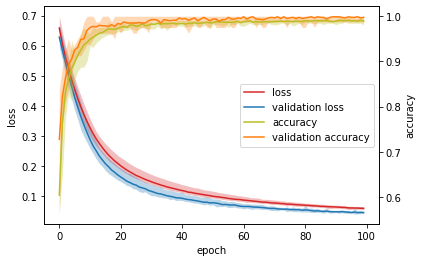

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plot_fill(ax1, loss, 'tab:red', 'loss')
plot_fill(ax1, val_loss, 'tab:blue', 'validation loss')

plot_fill(ax2, bin_acc, 'tab:olive', 'accuracy')
plot_fill(ax2, val_bin_acc, 'tab:orange', 'validation accuracy')


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=7)

ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax2.set_ylabel("accuracy")
plt.show()

In [7]:
test_true = np.load(path / "test_true.npy")
test_pred = np.load(path / "test_pred.npy")

accs = []
f1s = []
for true, pred in zip(test_true, test_pred):
    accs.append(metric.accuracy_score(true, pred))
    f1s.append(metric.f1_score(true, pred))

print('mean accuracy: ' + str(np.mean(accs)))
print('std accuracy: ' + str(np.std(accs)))

print('mean f1s: ' + str(np.mean(f1s)))
print('std f1s: ' + str(np.std(f1s)))

mean accuracy: 0.9870000000000001
std accuracy: 0.004582575694955844
mean f1s: 0.9881234361968307
std f1s: 0.004127757923730008
